df Shape:  (31321, 15)
          A         C         E         K         L         M         O
A  1.000000 -0.077369  0.022270  0.071350  0.058579  0.067277  0.224656
C -0.077369  1.000000 -0.038342 -0.005941 -0.001596 -0.009567 -0.006185
E  0.022270 -0.038342  1.000000  0.125241  0.081180  0.139487  0.326353
K  0.071350 -0.005941  0.125241  1.000000 -0.031297  0.082815  0.221688
L  0.058579 -0.001596  0.081180 -0.031297  1.000000  0.054575  0.147742
M  0.067277 -0.009567  0.139487  0.082815  0.054575  1.000000  0.223298
O  0.224656 -0.006185  0.326353  0.221688  0.147742  0.223298  1.000000


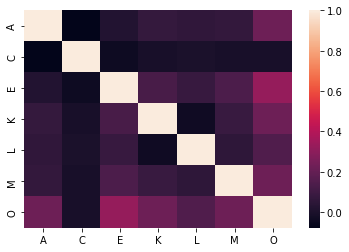

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn import svm


df = pd.read_csv('bench.csv', encoding='latin-1')
    
df.dropna(inplace= True)
print ("df Shape: ", df.shape)


#Generating the correlation matrix
corr = df.corr()

#Generating the correlation heat-map
sns.heatmap(corr)

print(corr)

In [2]:
df = pd.get_dummies(df)
labels = np.array(df['O'])
df= df.drop('O', axis = 1)
df_list = list(df.columns)

train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.2, random_state = 42)

print ("Train_x Shape: ",train_x.shape)
print ("Train_y Shape: ", train_y.shape)
print ("Test_x Shape: ", test_x.shape)
print ("Test_y Shape: ", test_y.shape)

Train_x Shape:  (25056, 107)
Train_y Shape:  (25056,)
Test_x Shape:  (6265, 107)
Test_y Shape:  (6265,)


In [3]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(train_x,train_y)

#Predict the response for test dataset
y_pred1 = clf.predict(test_x)
y_pred_prob = clf.predict_proba(test_x)[:,1]

print(confusion_matrix(test_y, y_pred1))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred1))
print ("AUC Score:", roc_auc_score(test_y, y_pred1))
print ("AUC Score prob:", roc_auc_score(test_y, y_pred_prob))
print ("Precision:", precision_score(test_y, y_pred1))
print ("Recall:", recall_score(test_y, y_pred1))
print ("F1 Score:", f1_score(test_y, y_pred1))


[[4160  600]
 [ 545  960]]
Accuracy: 0.8172386272944933
AUC Score: 0.7559116669923783
AUC Score prob: 0.7559116669923783
Precision: 0.6153846153846154
Recall: 0.6378737541528239
F1 Score: 0.6264274061990213


In [4]:
rfc = RandomForestClassifier(n_estimators=100, max_features=10)

rfc = rfc.fit(train_x,train_y)

#Predict the response for test dataset
y_pred3 = rfc.predict(test_x)

y_pred_prob = rfc.predict_proba(test_x)[:,1]

print(confusion_matrix(test_y, y_pred3))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred3))
print ("AUC Score:", roc_auc_score(test_y, y_pred3))
print ("AUC Score prob:", roc_auc_score(test_y, y_pred_prob))
print ("Precision:", precision_score(test_y, y_pred3))
print ("Recall:", recall_score(test_y, y_pred3))
print ("F1 Score:", f1_score(test_y, y_pred3))


[[4411  349]
 [ 587  918]]
Accuracy: 0.8505985634477254
AUC Score: 0.7683237248387728
AUC Score prob: 0.901140944749993
Precision: 0.7245461720599842
Recall: 0.6099667774086379
F1 Score: 0.6623376623376623


In [5]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(100, input_dim=107, activation='sigmoid'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])

network.fit(train_x,train_y, epochs=10, batch_size=10)

nn_pred = network.predict_classes(test_x)
nn_pred_prob= network.predict(test_x)

print(confusion_matrix(test_y, nn_pred))
print("Accuracy:",metrics.accuracy_score(test_y, nn_pred))
print ("AUC Score:", roc_auc_score(test_y, nn_pred))
print ("AUC Score prob:", roc_auc_score(test_y, nn_pred_prob))
print ("Precision:", precision_score(test_y, nn_pred))
print ("Recall:", recall_score(test_y, nn_pred))
print ("F1 Score:", f1_score(test_y, nn_pred))

Using TensorFlow backend.


Epoch 1/10
25056/25056 [==============================] - 2s 74us/step - loss: 0.1780 - accuracy: 0.7677
Epoch 2/10
25056/25056 [==============================] - 2s 70us/step - loss: 0.1771 - accuracy: 0.7693
Epoch 3/10
25056/25056 [==============================] - 2s 70us/step - loss: 0.1720 - accuracy: 0.7768
Epoch 4/10
25056/25056 [==============================] - 2s 70us/step - loss: 0.1685 - accuracy: 0.7819
Epoch 5/10
25056/25056 [==============================] - 2s 71us/step - loss: 0.1700 - accuracy: 0.7813 0s -
Epoch 6/10
25056/25056 [==============================] - 2s 71us/step - loss: 0.1678 - accuracy: 0.7878
Epoch 7/10
25056/25056 [==============================] - 2s 71us/step - loss: 0.1689 - accuracy: 0.7850
Epoch 8/10
25056/25056 [==============================] - 2s 70us/step - loss: 0.1715 - accuracy: 0.7793
Epoch 9/10
25056/25056 [==============================] - 2s 72us/step - loss: 0.1753 - accuracy: 0.7704 
Epoch 10/10
25056/25056 [========================

In [6]:
network = models.Sequential()
network.add(layers.Dense(100, input_dim=107, activation='sigmoid'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

network.fit(train_x,train_y, epochs=10, batch_size=10)

nn_pred = network.predict_classes(test_x)
nn_pred_prob= network.predict(test_x)

print(confusion_matrix(test_y, nn_pred))
print("Accuracy:",metrics.accuracy_score(test_y, nn_pred))
print ("AUC Score:", roc_auc_score(test_y, nn_pred))
print ("AUC Score prob:", roc_auc_score(test_y, nn_pred_prob))
print ("Precision:", precision_score(test_y, nn_pred))
print ("Recall:", recall_score(test_y, nn_pred))
print ("F1 Score:", f1_score(test_y, nn_pred))

Epoch 1/10
25056/25056 [==============================] - 2s 77us/step - loss: 0.5307 - accuracy: 0.7717
Epoch 2/10
25056/25056 [==============================] - 2s 71us/step - loss: 0.5295 - accuracy: 0.7744
Epoch 3/10
25056/25056 [==============================] - 2s 76us/step - loss: 0.5358 - accuracy: 0.7739
Epoch 4/10
25056/25056 [==============================] - 2s 79us/step - loss: 0.5252 - accuracy: 0.7836 0s - loss: 0.5269 - ac - ETA: 0s - loss: 0.5266 
Epoch 5/10
25056/25056 [==============================] - 2s 73us/step - loss: 0.5250 - accuracy: 0.7809 0s - loss: 0.5201 - ac
Epoch 6/10
25056/25056 [==============================] - 2s 72us/step - loss: 0.5429 - accuracy: 0.7665
Epoch 7/10
25056/25056 [==============================] - 2s 73us/step - loss: 0.5421 - accuracy: 0.7666 0s - loss: 0.5421 - accuracy
Epoch 8/10
25056/25056 [==============================] - 2s 73us/step - loss: 0.5383 - accuracy: 0.7666
Epoch 9/10
25056/25056 [==============================] - 2

In [7]:
network = models.Sequential()
network.add(layers.Dense(12, input_dim=107, activation='sigmoid'))
network.add(layers.Dense(7, activation='sigmoid'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])

network.fit(train_x,train_y, epochs=10, batch_size=10)

nn_pred = network.predict_classes(test_x)
nn_pred_prob= network.predict(test_x)

print(confusion_matrix(test_y, nn_pred))
print("Accuracy:",metrics.accuracy_score(test_y, nn_pred))
print ("AUC Score:", roc_auc_score(test_y, nn_pred))
print ("AUC Score prob:", roc_auc_score(test_y, nn_pred_prob))
print ("Precision:", precision_score(test_y, nn_pred))
print ("Recall:", recall_score(test_y, nn_pred))
print ("F1 Score:", f1_score(test_y, nn_pred))

Epoch 1/10
25056/25056 [==============================] - 2s 76us/step - loss: 0.1833 - accuracy: 0.7533
Epoch 2/10
25056/25056 [==============================] - 2s 72us/step - loss: 0.1788 - accuracy: 0.7639 0s -
Epoch 3/10
25056/25056 [==============================] - 2s 81us/step - loss: 0.1764 - accuracy: 0.7734
Epoch 4/10
25056/25056 [==============================] - 2s 71us/step - loss: 0.1676 - accuracy: 0.7877
Epoch 5/10
25056/25056 [==============================] - 2s 71us/step - loss: 0.1673 - accuracy: 0.7875
Epoch 6/10
25056/25056 [==============================] - 2s 72us/step - loss: 0.1672 - accuracy: 0.7878 0s - loss:
Epoch 7/10
25056/25056 [==============================] - 2s 72us/step - loss: 0.1663 - accuracy: 0.7894
Epoch 8/10
25056/25056 [==============================] - 2s 70us/step - loss: 0.1671 - accuracy: 0.7884 0s
Epoch 9/10
25056/25056 [==============================] - 2s 71us/step - loss: 0.1753 - accuracy: 0.7731 1s - loss: 0.1732  - ETA: 0s - loss:

In [8]:
network = models.Sequential()
network.add(layers.Dense(12, input_dim=107, activation='sigmoid'))
network.add(layers.Dense(7, activation='sigmoid'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

network.fit(train_x,train_y, epochs=10, batch_size=10)

nn_pred = network.predict_classes(test_x)
nn_pred_prob= network.predict(test_x)

print(confusion_matrix(test_y, nn_pred))
print("Accuracy:",metrics.accuracy_score(test_y, nn_pred))
print ("AUC Score:", roc_auc_score(test_y, nn_pred))
print ("AUC Score prob:", roc_auc_score(test_y, nn_pred_prob))
print ("Precision:", precision_score(test_y, nn_pred))
print ("Recall:", recall_score(test_y, nn_pred))
print ("F1 Score:", f1_score(test_y, nn_pred))

Epoch 1/10
25056/25056 [==============================] - 2s 76us/step - loss: 0.5507 - accuracy: 0.7624 0s - loss: 0.5508 - accuracy: 0.
Epoch 2/10
25056/25056 [==============================] - 2s 69us/step - loss: 0.5470 - accuracy: 0.7630
Epoch 3/10
25056/25056 [==============================] - 2s 68us/step - loss: 0.5467 - accuracy: 0.7630
Epoch 4/10
25056/25056 [==============================] - 2s 73us/step - loss: 0.5465 - accuracy: 0.7630 1s - loss: 0.5 - ETA: 0s -
Epoch 5/10
25056/25056 [==============================] - 2s 76us/step - loss: 0.5462 - accuracy: 0.7630
Epoch 6/10
25056/25056 [==============================] - 2s 75us/step - loss: 0.5459 - accuracy: 0.7630
Epoch 7/10
25056/25056 [==============================] - ETA: 0s - loss: 0.5458 - accuracy: 0.76 - 2s 74us/step - loss: 0.5458 - accuracy: 0.7630
Epoch 8/10
25056/25056 [==============================] - 2s 79us/step - loss: 0.5456 - accuracy: 0.7632
Epoch 9/10
25056/25056 [==============================] - 

In [9]:
network = models.Sequential()
network.add(layers.Dense(150, input_dim=107, activation='sigmoid'))
network.add(layers.Dense(50, activation='sigmoid'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])

network.fit(train_x,train_y, epochs=10, batch_size=10)

nn_pred = network.predict_classes(test_x)
nn_pred_prob= network.predict(test_x)

print(confusion_matrix(test_y, nn_pred))
print("Accuracy:",metrics.accuracy_score(test_y, nn_pred))
print ("AUC Score:", roc_auc_score(test_y, nn_pred))
print ("AUC Score prob:", roc_auc_score(test_y, nn_pred_prob))
print ("Precision:", precision_score(test_y, nn_pred))
print ("Recall:", recall_score(test_y, nn_pred))
print ("F1 Score:", f1_score(test_y, nn_pred))

Epoch 1/10
25056/25056 [==============================] - 2s 88us/step - loss: 0.1719 - accuracy: 0.7785
Epoch 2/10
25056/25056 [==============================] - 2s 78us/step - loss: 0.1679 - accuracy: 0.7882
Epoch 3/10
25056/25056 [==============================] - 2s 91us/step - loss: 0.1665 - accuracy: 0.7894
Epoch 4/10
25056/25056 [==============================] - 2s 91us/step - loss: 0.1690 - accuracy: 0.7846
Epoch 5/10
25056/25056 [==============================] - 2s 85us/step - loss: 0.1691 - accuracy: 0.7830
Epoch 6/10
25056/25056 [==============================] - 2s 76us/step - loss: 0.1724 - accuracy: 0.7781
Epoch 7/10
25056/25056 [==============================] - 2s 79us/step - loss: 0.1761 - accuracy: 0.7732
Epoch 8/10
25056/25056 [==============================] - 2s 84us/step - loss: 0.1753 - accuracy: 0.7742
Epoch 9/10
25056/25056 [==============================] - 2s 75us/step - loss: 0.1761 - accuracy: 0.7725
Epoch 10/10
25056/25056 [==============================

In [ ]:
network = models.Sequential()
network.add(layers.Dense(150, input_dim=107, activation='sigmoid'))
network.add(layers.Dense(50, activation='sigmoid'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

network.fit(train_x,train_y, epochs=10, batch_size=10)

nn_pred = network.predict_classes(test_x)
nn_pred_prob= network.predict(test_x)

print(confusion_matrix(test_y, nn_pred))
print("Accuracy:",metrics.accuracy_score(test_y, nn_pred))
print ("AUC Score:", roc_auc_score(test_y, nn_pred))
print ("AUC Score prob:", roc_auc_score(test_y, nn_pred_prob))
print ("Precision:", precision_score(test_y, nn_pred))
print ("Recall:", recall_score(test_y, nn_pred))
print ("F1 Score:", f1_score(test_y, nn_pred))

Epoch 1/10
25056/25056 [==============================] - 2s 85us/step - loss: 0.5366 - accuracy: 0.7726
Epoch 2/10
25056/25056 [==============================] - 2s 90us/step - loss: 0.5244 - accuracy: 0.7818 0s - loss: 0.5259 - accuracy: 0.
Epoch 3/10
25056/25056 [==============================] - 2s 89us/step - loss: 0.5226 - accuracy: 0.7822 0s - loss: 0.5249 - accuracy: 
Epoch 4/10
25056/25056 [==============================] - 2s 78us/step - loss: 0.5181 - accuracy: 0.7872 1s - loss: 0.521
Epoch 5/10
25056/25056 [==============================] - 2s 100us/step - loss: 0.5204 - accuracy: 0.78371s - loss:
Epoch 6/10
25056/25056 [==============================] - 2s 87us/step - loss: 0.5203 - accuracy: 0.7860 0s - loss: 0.5212 
Epoch 7/10
25056/25056 [==============================] - 2s 86us/step - loss: 0.5150 - accuracy: 0.7883
Epoch 8/10
25056/25056 [==============================] - 2s 78us/step - loss: 0.5157 - accuracy: 0.7891
Epoch 9/10
25056/25056 [=========================